# K-means clustering algorithm

## Exploratory Data Analysis

Note: this notebook may crash when running on a local machine due to OOM memory at the KMeans algorithm. Therefore, it is recommended to run this code on Google Colab.

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load data into a Pandas dataframe
df = pd.read_csv("marketing-campaign.csv")

In [34]:
# Show the first several data samples
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


This is a customer segmentation dataset with the following features:

- Year_Birth : Age of the customer.
- Education : Customer's level of education.
- Marital_Status : Customer's marital status.
- Income : Customer's yearly household income.
- Kidhome : Number of small children in customer's household.
- Teenhome : Number of teenagers in customer's household.
- Recency : Number of days since the last purchase.
- MntWines : The amount spent on wine products in the last 2 years.
- MntFruits : The amount spent on fruits products in the last 2 years.
- MntMeatProducts : The amount spent on meat products in the last 2 years.
- MntFishProducts : The amount spent on fish products in the last 2 years.
- MntSweetProducts : Amount spent on sweet products in the last 2 years.
- MntGoldProds : The amount spent on gold products in the last 2 years.
- NumDealsPurchases : Number of purchases made with discount.
- NumWebPurchases : Number of purchases made through the company's website.
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail).
- NumStorePurchases : Number of purchases made directly in stores.
- NumWebVisitsMonth : Number of visits to company's website in the last month.

In [35]:
# Show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [36]:
# Descibe the dataset
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


# Exploratory Data Analysis

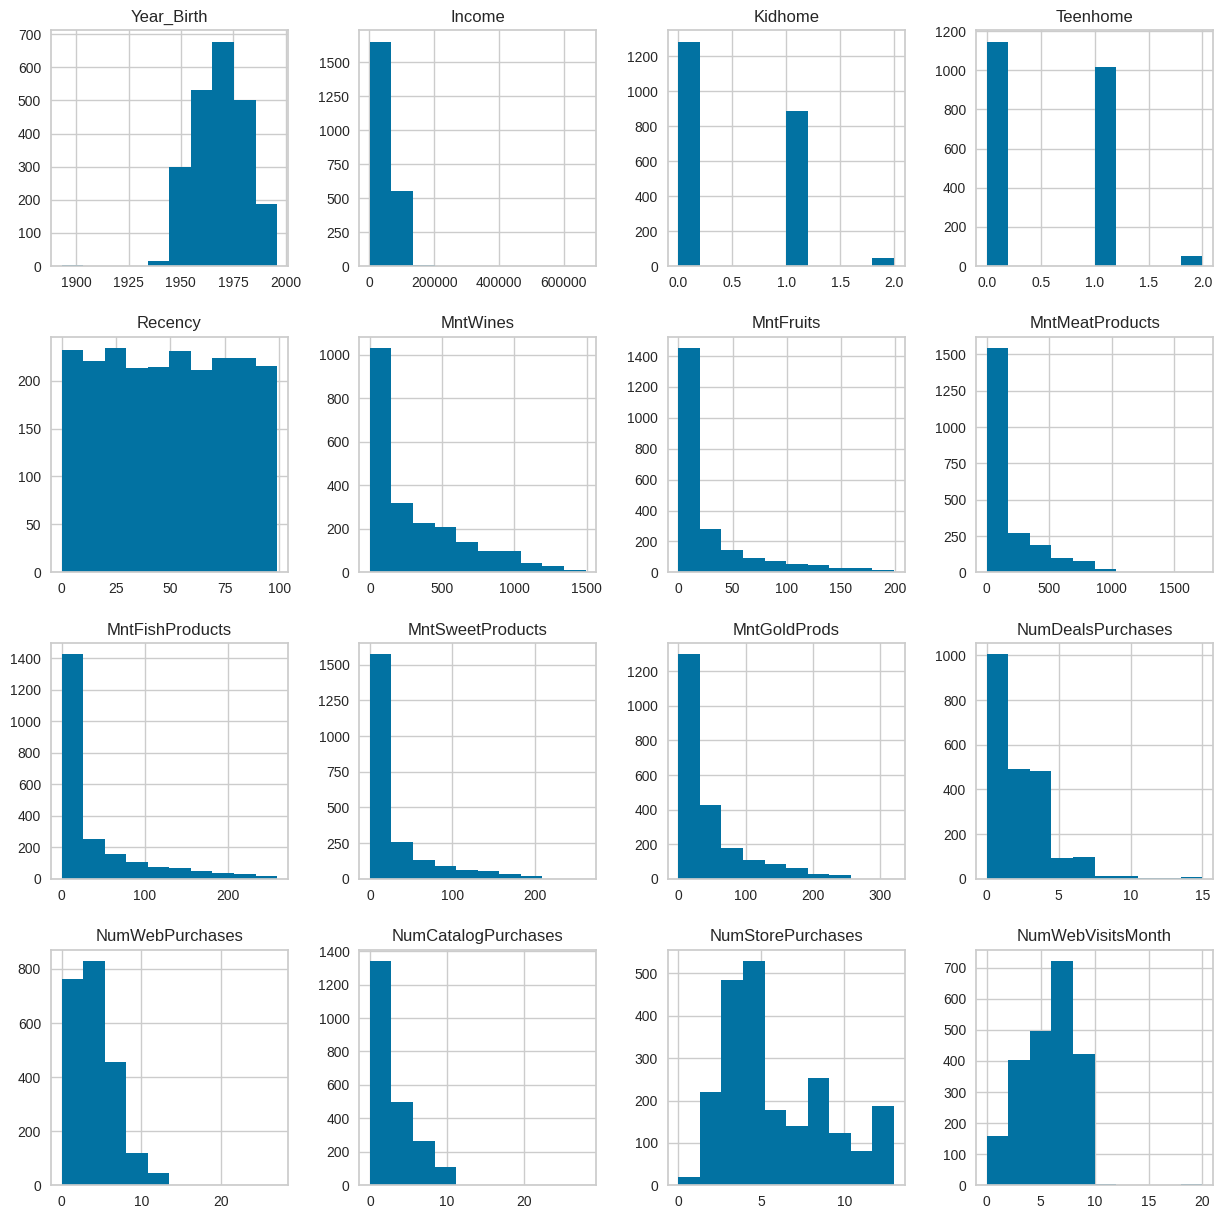

In [37]:
# Plot histograms of all data features
df.hist(figsize=(15, 15))
plt.show()

In [38]:
# Get the list of categorical features (i.e., having string column names)
cat_cols = [col for col in df.columns if df[col].dtypes=="O"]
cat_cols

['Education', 'Marital_Status']

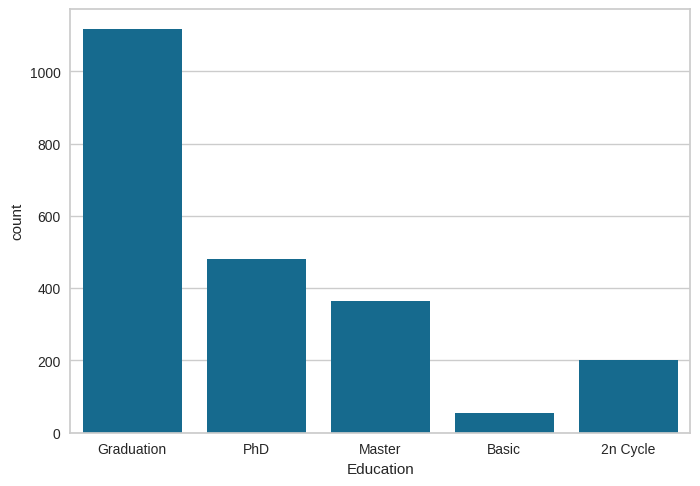

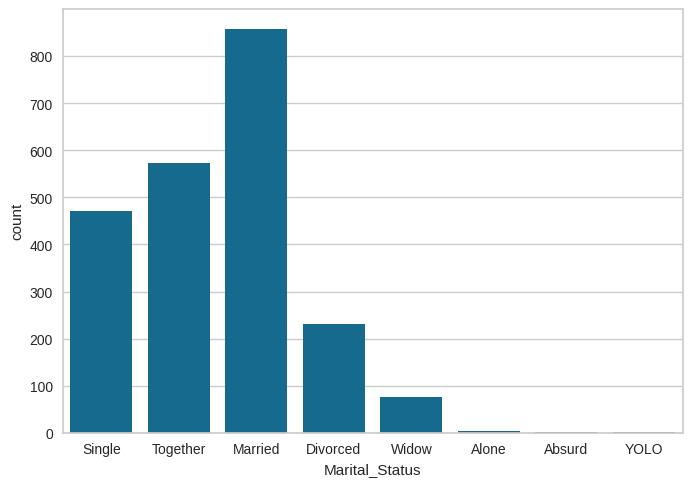

In [39]:
# Visualize the number of data samples in each categorical feature using countplot().
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.show()

<ipython-input-40-2b4c8ab3c341>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

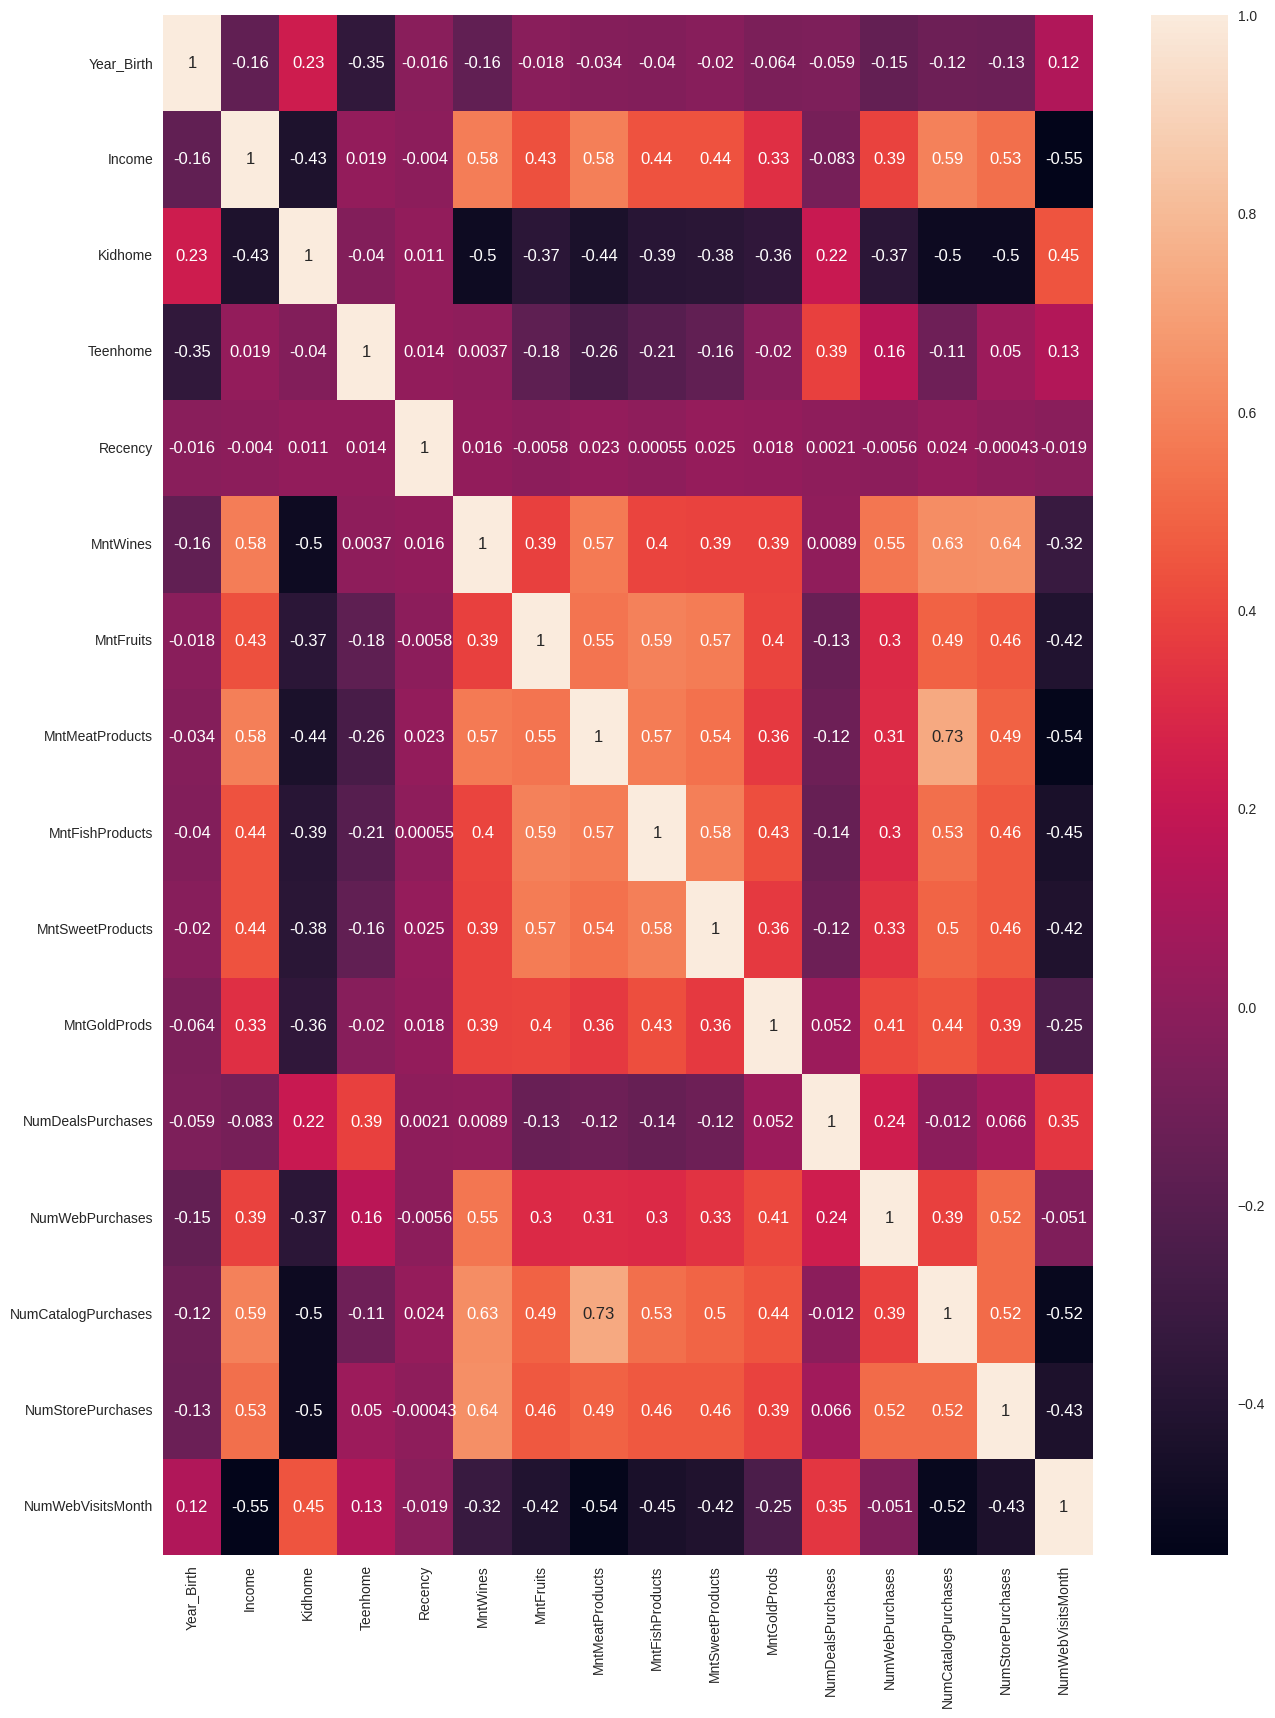

In [40]:
# Polt the correlation heatmap between pairs of features.
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# Observation: Income feature and MntXXX feature has a positive correlation, which means both tend to increase or decrease together.

# Data Preprocessing

In [41]:
# Make a copy of the data
data = df.copy()

In [42]:
# Import library to encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encode categorical features
for col in cat_cols:
    data.loc[:, col] = encoder.fit_transform(data[col])

<ipython-input-42-fcbdcbb155b4>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, col] = encoder.fit_transform(data[col])
<ipython-input-42-fcbdcbb155b4>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, col] = encoder.fit_transform(data[col])


In [43]:
# Show data after being encoded
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [44]:
# Import StandardScaler to standardize the data features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit (calculate mean and standard deviation) and transform (substract mean and divide by std) the data
scaled_data = scaler.fit_transform(data.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

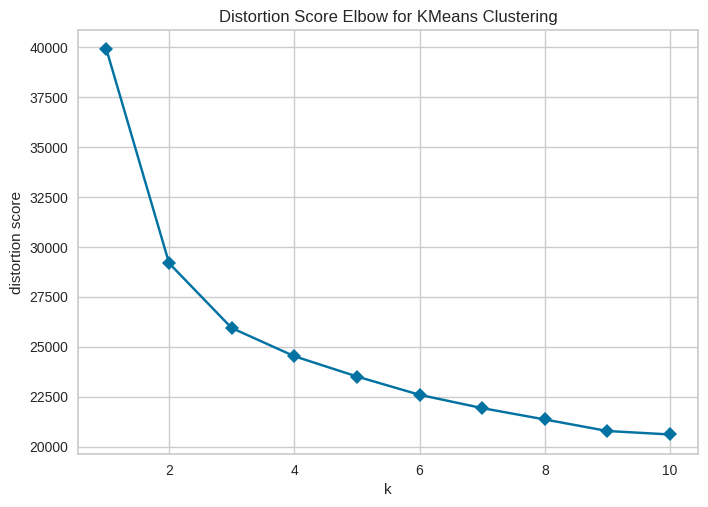

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Install yellowbrick library
# !pip install yellowbrick

# Import KElbowVisualizer to use Elbow method
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library to use Kmeans algorithm
from sklearn.cluster import KMeans

# Identify a good number of clusters between 1 and 11, do not show the fitting time and do not suggest elbow value.
# By default, the parameter locate_elbow is set to True, which automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”.
elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=False, locate_elbow=False)
elbow_method.fit(scaled_data)
elbow_method.show()

In [46]:
# Let us pick three clusters
kmeans_model = KMeans(n_clusters=3)

# Run K-means algorithm with K=3
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [47]:
# Show cluster label of training data samples
kmeans_model.labels_

array([2, 1, 2, ..., 2, 0, 1], dtype=int32)

In [48]:
# Make cluster label prediction of new data samples (assume here we use scaled_data as tes data samples).
kmeans_model.predict(scaled_data)

array([2, 1, 2, ..., 2, 0, 1], dtype=int32)

In [49]:
# Show location of cluster centroids
kmeans_model.cluster_centers_

array([[-0.36088435,  0.24551772, -0.04468191,  0.22592031, -0.38204461,
         0.79659316, -0.0039975 ,  0.4745954 , -0.15356742, -0.15714698,
        -0.18844767, -0.15944853,  0.3037471 ,  0.72681044,  0.79273595,
         0.11517916,  0.5443162 ,  0.18055033],
       [ 0.24865562, -0.1256503 , -0.00342925, -0.70856282,  0.67290394,
        -0.14071916, -0.00280881, -0.78827402, -0.53918822, -0.64357869,
        -0.55220745, -0.53540216, -0.55588851, -0.15167574, -0.72864572,
        -0.73328847, -0.80886524,  0.48887694],
       [-0.04371138, -0.04438637,  0.05287095,  0.969168  , -0.74409959,
        -0.59874848,  0.00899204,  0.84320618,  1.08008395,  1.26166924,
         1.13897371,  1.07982493,  0.62718813, -0.50663587,  0.40677953,
         1.12784518,  0.80489697, -1.02278488]])

# Dimensionality reduction with Principal Component Analysis (PCA)

In [50]:
# Import PCA library
from sklearn.decomposition import PCA

# Find all principal components (i.e, eigen vectors of the covariance matrix, and eigen values) of the data, and equal to the number of data features.
pca = PCA(n_components=len(data.columns))
pca.fit(scaled_data)

PCA(n_components=18)

In [51]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

# Note: by ranking the eigenvectors in order of their eigenvalues, highest to lowest, we get the principal components in order of significance.

Amount of variance carried in each principal components (eigen values) :
[6.09299447 2.0144925  1.3515532  1.04802853 0.99785744 0.97560491
 0.76554543 0.67599261 0.64157932 0.58329771 0.48291483 0.44942174
 0.42031716 0.38937866 0.35453694 0.30461226 0.24459997 0.21539873]

Ratio of variance carried in each principal components (eigen values) :
[0.33834694 0.11186575 0.07505241 0.05819753 0.05541151 0.05417581
 0.04251111 0.0375382  0.03562721 0.03239081 0.0268165  0.02495661
 0.02334042 0.02162239 0.01968761 0.01691527 0.01358275 0.0119612 ]

Cummulative sum of all ratios :
[0.33834694 0.45021269 0.52526509 0.58346262 0.63887413 0.69304995
 0.73556106 0.77309925 0.80872646 0.84111727 0.86793376 0.89289037
 0.91623079 0.93785317 0.95754078 0.97445605 0.9880388  1.        ]


# 3-dimensional PCA

In [52]:
# We test the three most important principal components as they cover 52.5% (0.525) of the data variance.
pca3 = PCA(n_components=3)

# Fit (i.e., construct the 3-dimensional PCA space) and transform (i.e., project the original data points into the 3-dimensional PCA space).
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

In [53]:
# Show the data frame
pca3_df

,pca_1,pca_2,pca_3
0,3.821333,-0.262283,1.303423
1,-2.298684,0.211362,-1.078003
2,1.897447,-0.273171,-0.110652
3,-2.466215,-1.439710,0.322489
4,-0.270019,0.018106,0.594266
...,...,...,...
2211,2.680231,1.061187,1.807844
2212,-1.509792,3.436696,0.045528
2213,1.288111,-0.732528,0.148586
2214,2.074261,1.206405,-1.089776


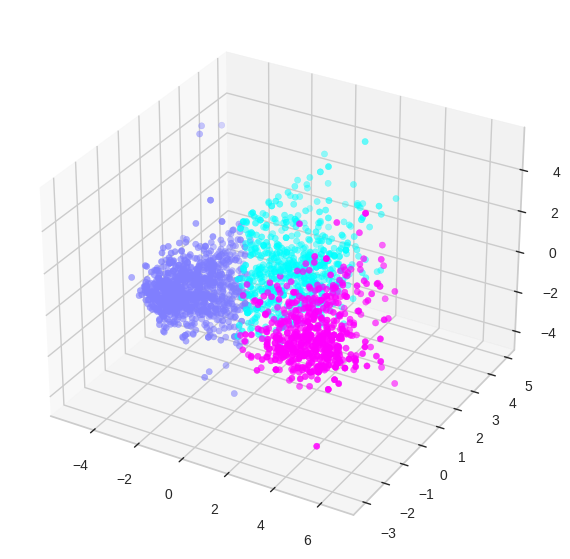

In [54]:
# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

# 2-dimensional PCA

In [55]:
# We test the two most important principal components as they cover 45.0% (0.45) of the data variance.
pca2 = PCA(n_components=2)

# Fit (i.e., construct the 2-dimensional PCA space) and transform (i.e., project the original data points into the 2-dimensional PCA space).
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

In [56]:
pca2_df.head()

,pca_1,pca_2
0,3.821340,-0.261898
1,-2.298686,0.211604
2,1.897453,-0.272962
3,-2.466215,-1.439910
4,-0.270013,0.017408


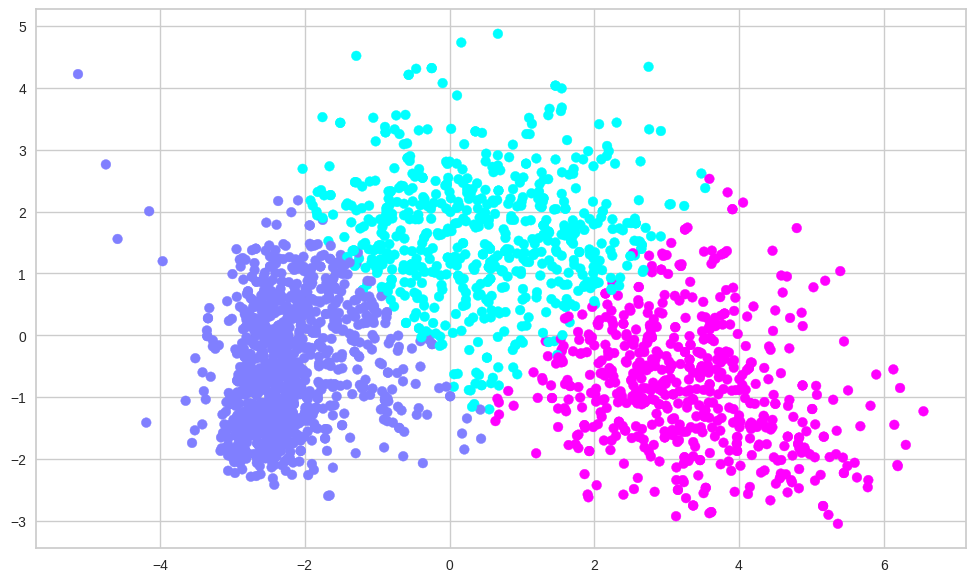

In [57]:
# Plot the data points in the 2-dimensional space with feature pca_1 and pca_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca2_df.pca_1, pca2_df.pca_2, c=kmeans_model.labels_, cmap="cool")
plt.show()

<ipython-input-58-b1754a43c14d>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label


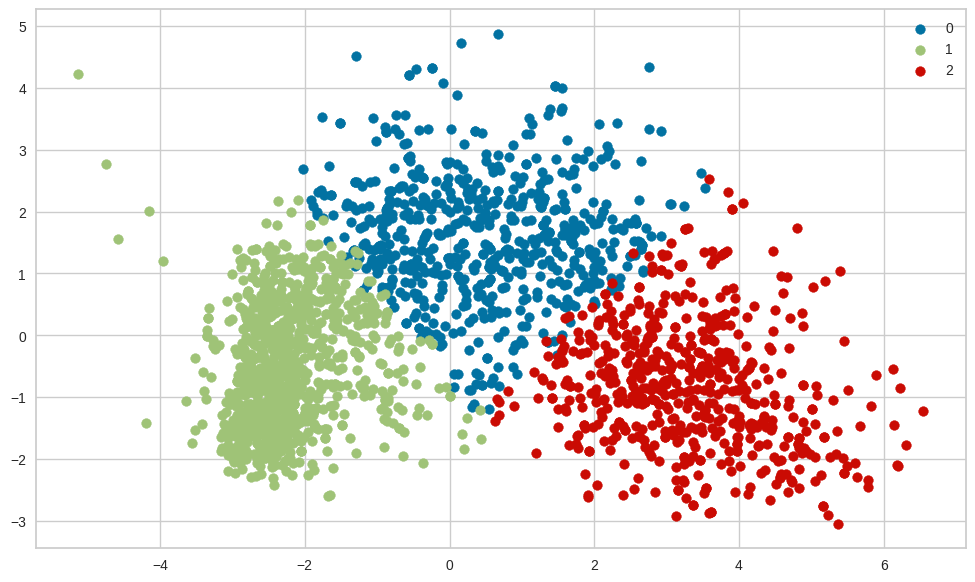

In [58]:
# Visualize the cluster with legend
plt.figure(figsize=(12, 7))
ax = plt.subplot()

# List of labels
group = kmeans_model.labels_

# Plot data samples in each label group: 0, 1 and 2.
for g in np.unique(group):
    index = np.where(group==g)     # Get all indices of label group g
    ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label
ax.legend()
plt.show()

# Save and load the model

In [59]:
# Save model using pickle library
import pickle
file_name = "model.sav"                              # Path to save the model
pickle.dump(kmeans_model, open(file_name, "wb"))     # Save the model to a pickle file

# Note: the kmeans_model is having three clusters.

In [60]:
# Load the saved model using pickle library
file_name = "model.sav"
load_model = pickle.load(open(file_name, "rb"))

In [61]:
# Access cluster information from the loaded model
cluster = load_model.labels_
cluster_0 = np.where(cluster==0)   # indices of data samples in cluster 0
cluster_1 = np.where(cluster==1)   # indices of data samples in cluster 1
cluster_2 = np.where(cluster==2)   # indices of data samples in cluster 2

In [62]:
# Get data samples in cluster 0
data.iloc[cluster_0]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
4,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5
5,1967,3,5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6
6,1971,2,2,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6
12,1952,3,2,59354.0,1,1,53,233,2,53,3,5,14,3,6,1,5,6
17,1949,3,3,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1962,2,4,57967.0,0,1,39,229,7,137,4,0,91,5,4,2,8,5
2207,1970,3,4,44802.0,0,0,71,853,10,143,13,10,20,2,9,4,12,8
2211,1967,2,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2212,1946,4,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7
